https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('spotify.csv')

In [3]:
df.index

RangeIndex(start=0, stop=18835, step=1)

DESCRIÇÃO DO DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18835 non-null  int64  
 1   song_name         18835 non-null  object 
 2   song_popularity   18835 non-null  object 
 3   song_duration_ms  18835 non-null  object 
 4   acousticness      18835 non-null  object 
 5   danceability      18835 non-null  object 
 6   energy            18835 non-null  object 
 7   instrumentalness  18835 non-null  object 
 8   key               18835 non-null  float64
 9   liveness          18835 non-null  object 
 10  loudness          18835 non-null  object 
 11  audio_mode        18835 non-null  object 
 12  speechiness       18835 non-null  object 
 13  tempo             18835 non-null  object 
 14  time_signature    18835 non-null  object 
 15  audio_valence     18834 non-null  float64
dtypes: float64(2), int64(1), object(13)
memo

In [5]:
df.head()

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574


O dataset apresenta 18835 entradas, sendo que cada uma delas corresponde a uma música disponível no Spotify. 

'song_name' - Nome da música

'song_popularity' - Indica as músicas mais tocadas. Quanto mais próximo de 100, mais popular

'song_duration_ms' - Duração da música em milisegundos

'acousticness' - Indica quanto cada música é acústica, varia entre 0 e 1

'danceability' - Indica quanto cada música é apropriada para dançar, varaie entre 0 e 1

'energy' - Foi calculado de modo a indicar uma percepção subjetiva de intensidade da música

'key' - É uma estimativa da key predominante da música . 0 = C, 1 = C♯/D♭, 2 = D, assim em diante . Se nenhuma key 
foi detectada o valor é -1.

'liveness' - Foi calculada de modo a indicar a probabilidade de a música ter sido gravada em um show ao vivo.

'loudness' - É a média da intensidade do som medida em decibel

'audio_mode' - indica se predominam as notas musicais maiores ou menores. 0 = menor, 1 = maior

'speechiness'- detecta a presença de som falado na musica, varia entre 0 e 1

'tempo'- indica o ritmo da música em batidas por minuto

'audio_valence'- é uma medida da euforia transmitida pela música, varia entre 0 e 1

LIMPEZA DOS DADOS

In [6]:
df['acousticness']=df['acousticness'].str.strip('kg')

df['danceability']=df['danceability'].str.strip('mol/L')

transformando em float

In [7]:
df.drop(index=1757, inplace=True)
df['song_popularity']=df['song_popularity'].astype('float')

In [8]:
df['song_duration_ms']=df['song_duration_ms'].astype('float')

In [9]:
df['acousticness']=df['acousticness'].astype('float')

In [10]:
df['danceability']=df['danceability'].astype('float')

In [11]:
df.drop(index=72, inplace=True)
df['energy']=df['energy'].astype('float')

In [12]:
df.drop(index=923, inplace=True)
df.drop(index=1392, inplace=True)
df['instrumentalness']=df['instrumentalness'].astype('float')

In [13]:
df[df['liveness']=='nao_sei']
df.drop(index=125, inplace=True)
df.drop(index=1181, inplace=True)
df.drop(index=1046, inplace=True)
df.drop(index=6616, inplace=True)
df['liveness']=df['liveness'].astype('float')

In [14]:
df.drop(index=1706, inplace=True)
df['loudness']=df['loudness'].astype('float')

In [15]:
df[df['audio_mode']=='nao_sei']
df.drop(index=6587, inplace=True)
df['audio_mode']=df['audio_mode'].astype('float')

In [16]:
df.drop(index=819, inplace=True)
df['speechiness']=df['speechiness'].astype('float')

In [17]:
df.drop(index=1564, inplace=True)
df['tempo']=df['tempo'].astype('float')

In [18]:
df[df['time_signature']=='nao_sei']
df.drop(index=521, inplace=True)
df['time_signature']=df['time_signature'].astype('float')

tirando linhas com nomes da música iguais

In [19]:
df.drop_duplicates(subset=['song_name'],keep='first', inplace=True)

tirando a coluna 0

In [20]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13065 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         13065 non-null  object 
 1   song_popularity   13065 non-null  float64
 2   song_duration_ms  13065 non-null  float64
 3   acousticness      13065 non-null  float64
 4   danceability      13065 non-null  float64
 5   energy            13065 non-null  float64
 6   instrumentalness  13065 non-null  float64
 7   key               13065 non-null  float64
 8   liveness          13065 non-null  float64
 9   loudness          13065 non-null  float64
 10  audio_mode        13065 non-null  float64
 11  speechiness       13065 non-null  float64
 12  tempo             13065 non-null  float64
 13  time_signature    13065 non-null  float64
 14  audio_valence     13065 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.6+ MB


Há dados faltantes?

In [22]:
df.isna().values.any()

False

Não

Na coluna 'audio_mode', o número 0 representa minor e o 0 representa major 

In [23]:
dictionary={1:'major', 0:'minor'}
df['audio_mode'] = df['audio_mode'].replace(dictionary)

Na célula abaixo, foram feitas as seguintes alterações na coluna 'song_duration_ms':
- os valores negativos foram substituídos por seus valores absolutos
- os valores foram convertidos para segundos
- a coluna foi renomeada
- os valores acima de quatro horas foram substituidos pela média dos valores abaixo de quatro horas


In [24]:
df['song_duration_ms']=df['song_duration_ms'].abs()
df['song_duration_ms']=df['song_duration_ms']/1000
df=df.rename(columns={'song_duration_ms': 'song_duration_seconds'})
df['song_duration_seconds']=df['song_duration_seconds'].astype('float')
média_modificada = df[df['song_duration_seconds']<144000].mean()
df['song_duration_seconds'].where(df['song_duration_seconds']<14400,other=média_modificada, inplace=True)

ALGUMAS DISTRIBUIÇÔES

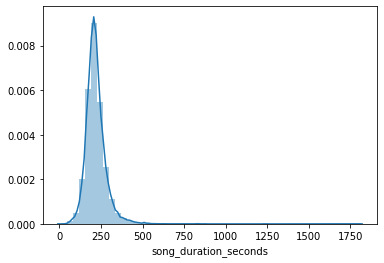

In [25]:
sns.distplot(df['song_duration_seconds'])

Podemos ver que eles ficaram concentrados próximos aos 250 segundos.
Para dar um 'zoom', descartei os valores acima de 800 segundos na montagem do gráfico

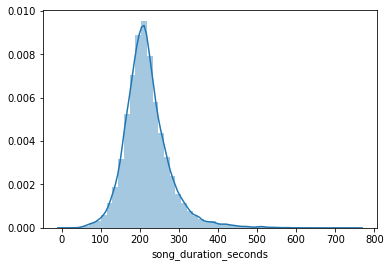

In [26]:
musicas_mais_curtas = df[df['song_duration_seconds']<800]
sns.distplot(musicas_mais_curtas['song_duration_seconds'])

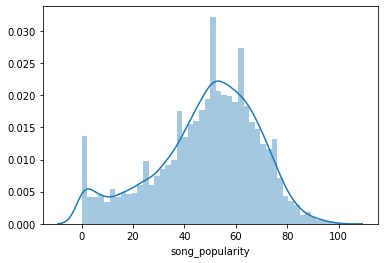

In [27]:
sns.distplot(df['song_popularity'])

RELAÇÕES ENTRE OS DADOS

Pela intuição, é esperado que a duração da música tenha alguma influência sobre sua popularidade.
Vamos testar essa hipótese.

In [28]:
ranges=[0,10,20,30,40,50,60,70,80,90,100]
group_names=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['song_popularity_byrange']= pd.cut(df['song_popularity'], bins = ranges, labels=group_names)
ranges=[0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900]
group_names=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15']
df['song_duration_byrange']= pd.cut(df['song_duration_seconds'], bins = ranges, labels=group_names)

Foram criadas duas novas colunas song_popularity_byrange e song_duration_byrange, que correspondem a divisão em categorias das colunas song_popularity e song_duration, respectivamente

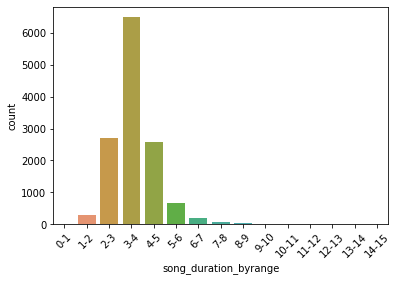

In [29]:
grafico=sns.countplot(df['song_duration_byrange'])
grafico.set_xticklabels(labels=group_names,rotation=45)
plt.show(grafico)

<function matplotlib.pyplot.show(*args, **kw)>

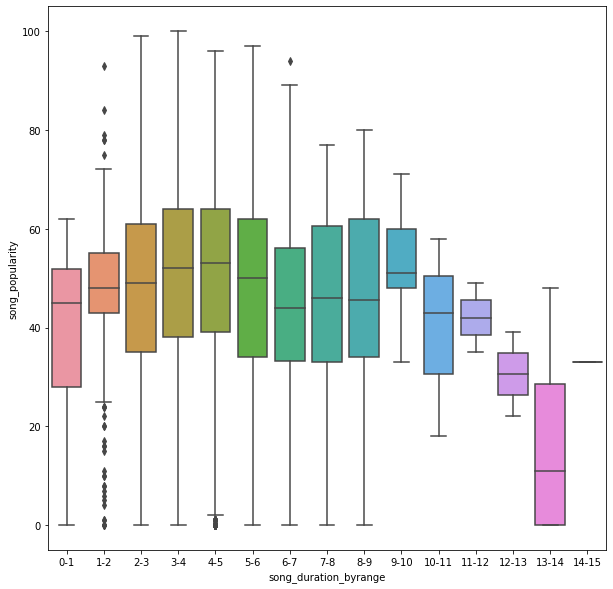

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(y='song_popularity',x='song_duration_byrange',data=df)
plt.show

Nesse boxplot, observamos que:
 
 -nas músicas com duração acima de 9 minutos, as músicas mais longas tendem a ser menos populares.
 
 -nas músicas coom duração entre 1 e 2 minutos, há uma quantidade maior de outliers que nas outras categorias.       Contudo, o primeiro e o terceiro quartil estão bem próximos.
 
 -a categoria de músicas com duração entre 4 e 5 minutos tem a mediana mais popular.

Será que a presença de instrumentos torna uma música mais propícia para dança?

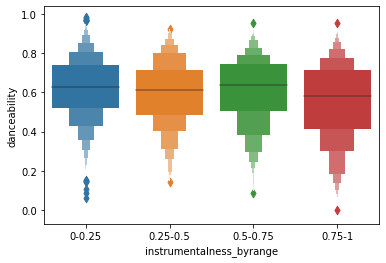

In [31]:
ranges=[0,0.25,0.5,0.75,1]
df['instrumentalness_byrange'] = pd.cut(df['instrumentalness'], bins = ranges, labels=['0-0.25','0.25-0.5','0.5-0.75','0.75-1'])
sns.boxenplot(x='instrumentalness_byrange',y='danceability', data= df)

O gráfico sugere que não. As distribuições em cada intervalo de instrumentalness estão bem parecidas. 

Continuar comparando duas a duas será pouco produtivo.
Usei o .pairplot para ter uma ideia geral

<Figure size 7200x7200 with 0 Axes>

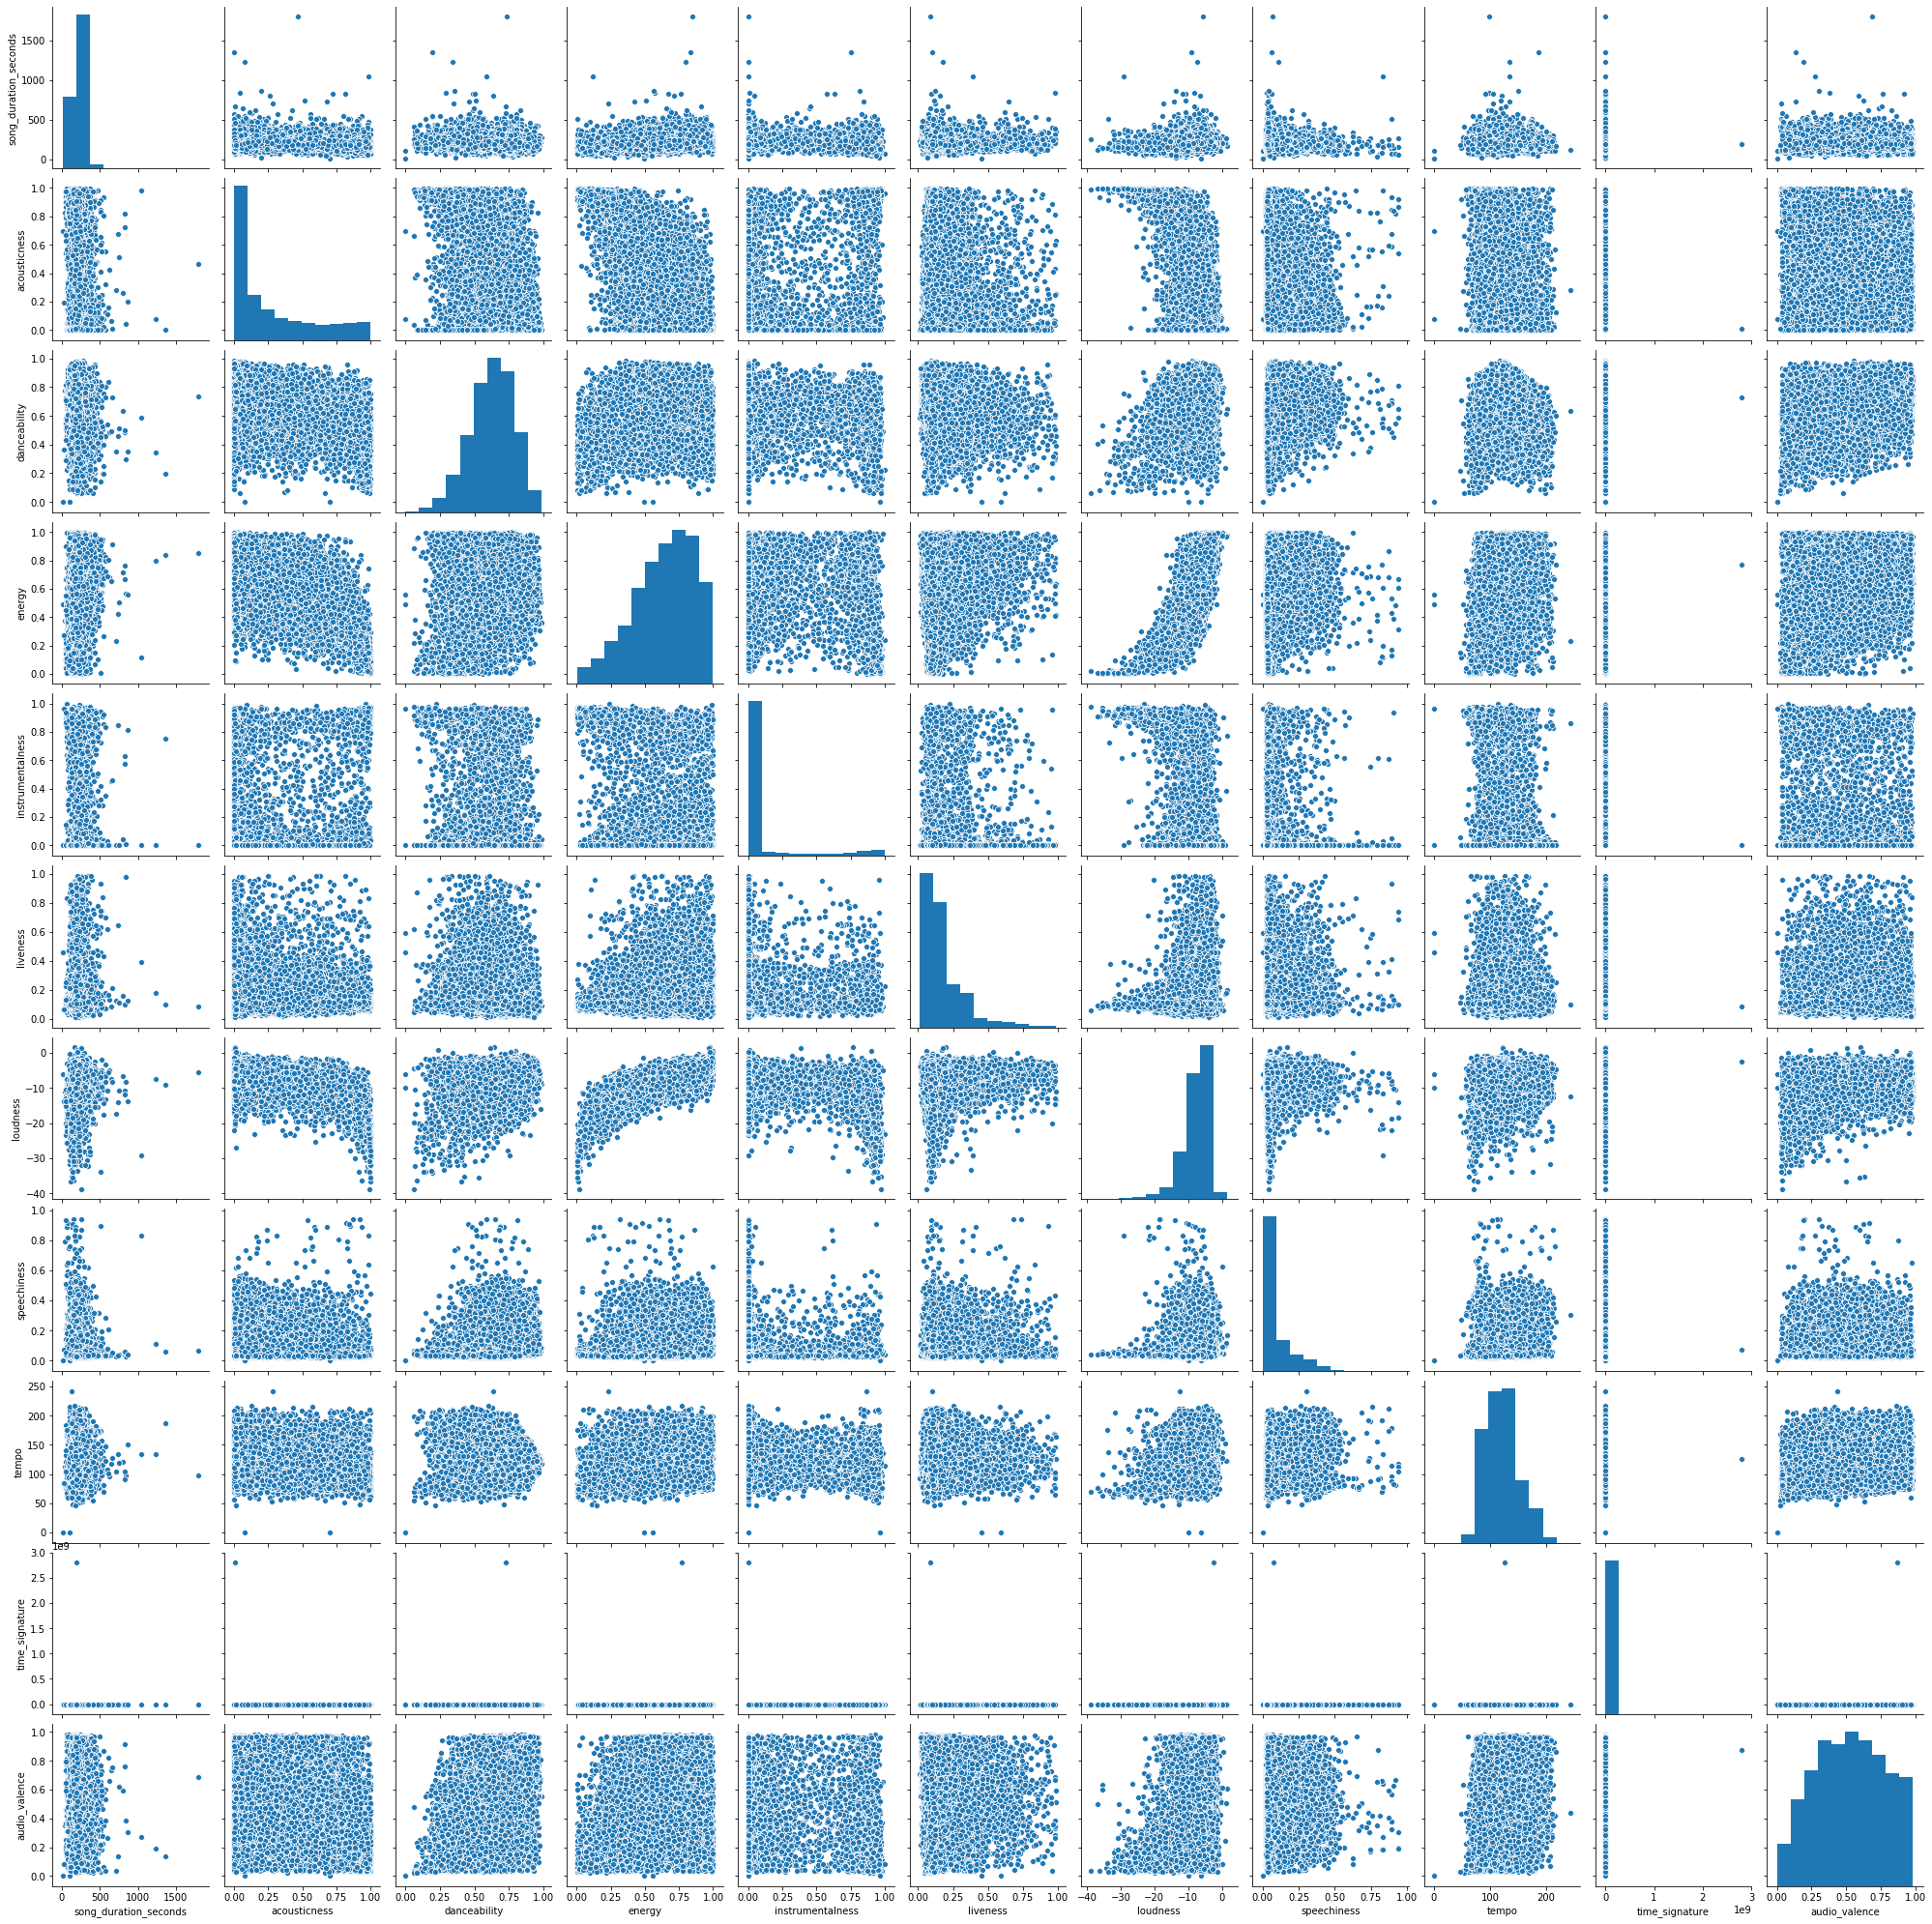

In [32]:
plt.figure(figsize=(100,100))
sns.pairplot(df[['song_duration_seconds','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature','audio_valence']])
plt.show()

As colunas 'loudness' e 'energy' mostram alguma relação


Dando um zoom nesse scatter plot

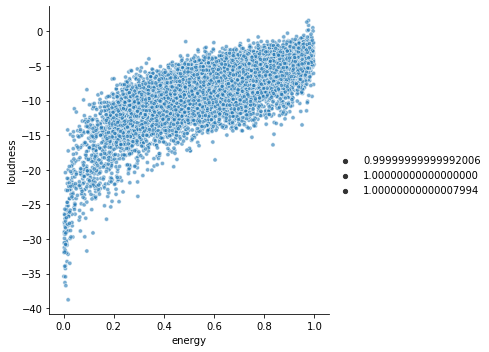

In [33]:
sns.relplot(data=df,kind='scatter', x = 'energy', y='loudness',alpha=0.6,size=.0000001)

Olhando de perto, observa-se que a aparente relacao pode ter se dado por conta de uma concentração dos valores de 'loudness' entre -20 e 0 

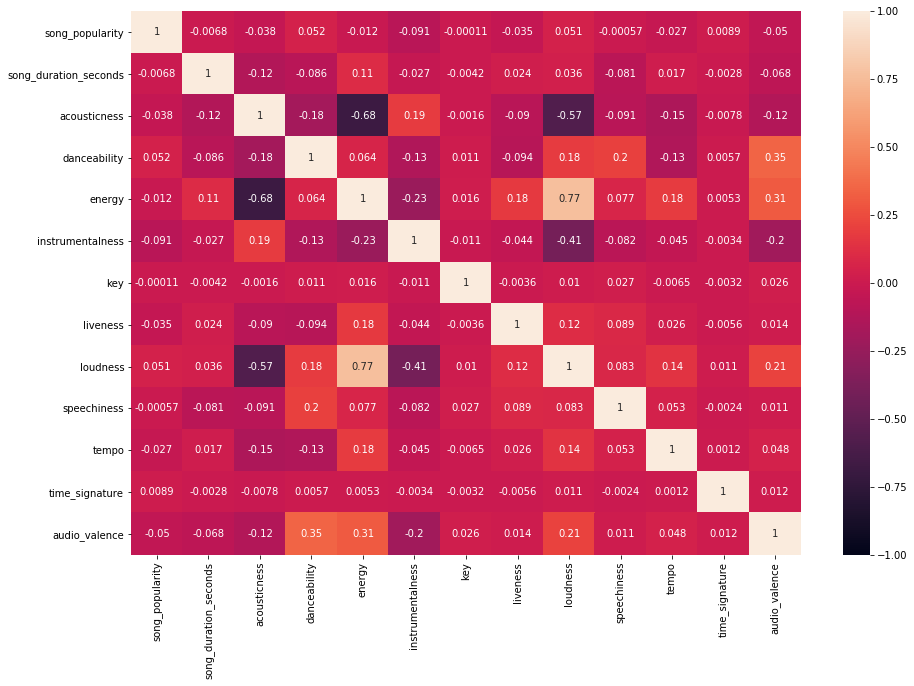

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Considerando a totalidade dos dados numéricos, não há correlacao linear forte entre as variáveis.